In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

## Biofuels

In [2]:
df = pd.DataFrame(
    {
        'Period':range(2000, 2011),
        'United States':(105.54, 115.71, 140.29, 183.87, 223.29, 260.61, 334.95, 457.33, 649.68, 746.52, 887.62),
        'Brazil':(183.89, 197.59, 216.93, 249.35, 251.72, 276.42, 307.31, 395.68, 486.35, 477.53, 527.32),
        'Germany':(4.3, 5.4, 8.8, 14, 20.4, 35.8, 59.4, 63.8 ,65, 58, 62),
        'India':(2.9, 3.0, 3.2, 3.3, 3.5, 3.9, 4.5, 4.7, 5.2, 7, 7),
        'Malawi':(.2,) * 11,
        'Australia':(0, 0, 0, 0, .10, .6, 1.7, 2.1, 3.4, 5.2, 7.9),        
    }
)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Period         11 non-null     int64  
 1   United States  11 non-null     float64
 2   Brazil         11 non-null     float64
 3   Germany        11 non-null     float64
 4   India          11 non-null     float64
 5   Malawi         11 non-null     float64
 6   Australia      11 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 748.0 bytes


In [3]:
df.head()

,Period,United States,Brazil,Germany,India,Malawi,Australia
0,2000,105.54,183.89,4.3,2.9,0.2,0.0
1,2001,115.71,197.59,5.4,3.0,0.2,0.0
2,2002,140.29,216.93,8.8,3.2,0.2,0.0
3,2003,183.87,249.35,14.0,3.3,0.2,0.0
4,2004,223.29,251.72,20.4,3.5,0.2,0.1


In [4]:
pivot = df.melt(id_vars=['Period'], var_name='Location', value_name='Production')
pivot

,Period,Location,Production
0,2000,United States,105.54
1,2001,United States,115.71
2,2002,United States,140.29
3,2003,United States,183.87
4,2004,United States,223.29
...,...,...,...
61,2006,Australia,1.70
62,2007,Australia,2.10
63,2008,Australia,3.40
64,2009,Australia,5.20


In [5]:
pivot.to_clipboard(excel=True, sep="\t", index=None)

## Random Data

In [6]:
start_date, end_date = '2010-01-01', '2021-01-01'

location_list = ['DE', 'CT', 'NY', 'NJ']
location_prob = [.18,.23,.25,.34]

employee_list = ['Pat', 'Leslie', "Jes", 'Sam']
employee_prob = [.1,.2,.3,.4]

current_date = datetime.now()

N = 12000

np.random.RandomState(seed=7)

df = pd.DataFrame(
    
    {
        'tran_date':np.random.choice(np.arange(start_date, end_date, dtype='datetime64[D]'), size=N),
        'locations':np.random.choice(location_list, size=(N,), p=location_prob),
        'employees':np.random.choice(employee_list, size=(N,), p=employee_prob),
        'sales_hrs':np.random.choice(np.arange(1,25,1, dtype='int64'), size=N),
        'sales_tot':np.random.normal(loc=1000, scale=20, size=N).round(2)
    }
    
)

df['docs_date'] = current_date.strftime("%Y-%m-%d %H:%M:%S")
df['forecasts'] = np.where(df['tran_date'] <= current_date.strftime("%Y-%m-%d"), False, True)
df.loc[df['tran_date'].dt.year == 2015, ['sales_tot']] = df['sales_tot'] * .65

em = df['employees'] == 'Leslie'
dt = df['tran_date'].between("2012-02-17", "2014-07-31")

df.loc[em & dt, ['sales_hrs', 'sales_tot']] = 0

df.dropna(axis=0, inplace=True)

df['sales_hrs']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   tran_date  12000 non-null  datetime64[s]
 1   locations  12000 non-null  object       
 2   employees  12000 non-null  object       
 3   sales_hrs  12000 non-null  int64        
 4   sales_tot  12000 non-null  float64      
 5   docs_date  12000 non-null  object       
 6   forecasts  12000 non-null  bool         
dtypes: bool(1), datetime64[s](1), float64(1), int64(1), object(3)
memory usage: 574.3+ KB


In [7]:
df.head()

,tran_date,locations,employees,sales_hrs,sales_tot,docs_date,forecasts
0,2017-08-31,NJ,Sam,19,992.53,2024-10-08 21:00:28,False
1,2014-04-20,NY,Sam,17,990.95,2024-10-08 21:00:28,False
2,2010-03-09,NY,Leslie,2,1001.85,2024-10-08 21:00:28,False
3,2012-03-19,NJ,Leslie,0,0.00,2024-10-08 21:00:28,False
4,2011-03-16,NJ,Sam,20,993.38,2024-10-08 21:00:28,False


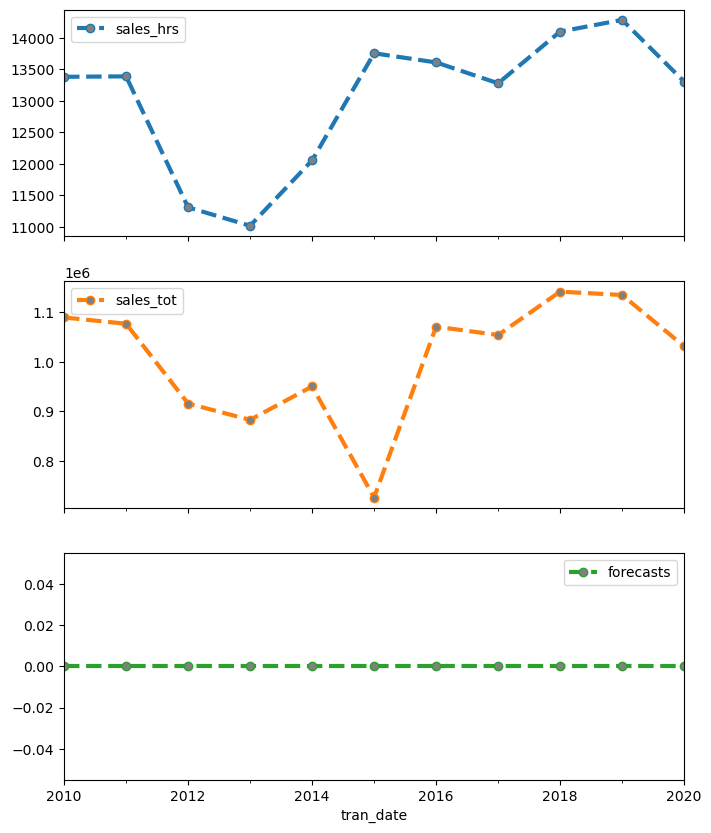

In [9]:
df.groupby(pd.Grouper(key='tran_date', freq='YE')).sum()\
.plot(subplots=True, marker='o', markerfacecolor='gray', lw=3, ls='--', figsize=(8,10));

## Map Data

In [11]:
URL = 'https://www2.census.gov/geo/docs/reference/cenpop2020/CenPop2020_Mean_ST.txt'

df = pd.read_csv(URL)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATEFP     52 non-null     int64  
 1   STNAME      52 non-null     object 
 2   POPULATION  52 non-null     int64  
 3   LATITUDE    52 non-null     float64
 4   LONGITUDE   52 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


In [12]:
df.head()

,STATEFP,STNAME,POPULATION,LATITUDE,LONGITUDE
0,1,Alabama,5024279,33.016191,-86.753353
1,2,Alaska,733391,61.408891,-148.961508
2,4,Arizona,7151502,33.371388,-111.882468
3,5,Arkansas,3011524,35.199251,-92.713212
4,6,California,39538223,35.491035,-119.347852
